# PROPAGATION : SPLIT OPERATOR METHOD

# TWO PARTICLES HARMONIC OSCILLATOR

In [1]:
#-----Loading packages--------------

import numpy as np
import scipy.fftpack as fftpack
import matplotlib.pyplot as plt
import time
import h5py

In [2]:
#---- Harmonic potential --------------
mass=1. 
omega=10
hbar=1

#---- Potential--------------------------

def Potential(x1,x2):
        return 0.5*mass*omega**2*(x1**2+x2**2)

#--- Gradient of x1:
    
def dPotentialdx1(x1):
        return mass*omega**2*x1


#----Single Gaussian wave packet

def Psi(x, x_init , k_init ):
    s = 1 
    return np.exp( -0.5*( (x-x_init)/s )**2 - 1j*x*k_init ) 
    


In [3]:
#----Parameters in atomic units-----

X1_gridDIM =  124       # Discretization grid size in X_1
X2_gridDIM =  124       # Discretization grid size in X_2
X1_amplitude  = 4       # Window range -X1_amplitude to X1_amplitude
X2_amplitude  = 4       # Window range -X2_amplitude to X2_amplitude
dt = 0.001               # Time increment
timeSteps = 100000       # Number of iterations
hbar=1                  # Plank constant

#-----Discretization resolution-----

dX1 =  2.*X1_amplitude/float(X1_gridDIM)
dX2 =  2.*X2_amplitude/float(X2_gridDIM)
dK1 =  2.*np.pi/(2.*X1_amplitude)
dK2 =  2.*np.pi/(2.*X2_amplitude)
K1_amplitude = dK1*X1_gridDIM/2.
K2_amplitude = dK2*X2_gridDIM/2.

#-----vectors with range of coordinates-----

timeRange     =  np.array(range(0,timeSteps+1))*dt 

X1_range      =  np.linspace(-X1_amplitude      , X1_amplitude  -dX1 , X1_gridDIM )
#X1_range      =  X1_range.astype(np.float32)

K1_range      =  np.linspace(-K1_amplitude      , K1_amplitude  -dK1 , X1_gridDIM)
#K1_range      =  K1_range.astype(np.float32)

X2_range      =  np.linspace(-X2_amplitude      , X2_amplitude  -dX2 , X2_gridDIM )
#X2_range      =  X2_range.astype(np.float32)

K2_range      =  np.linspace(-K2_amplitude      , K2_amplitude  -dK2 , X2_gridDIM)
#K2_range      =  K2_range.astype(np.float32)

#---- Matrixs with grid coordinates  -----

X1            =  fftpack.fftshift(X1_range)[np.newaxis,:]
K1            =  fftpack.fftshift( K1_range )[np.newaxis,:]


X2            =  fftpack.fftshift(X2_range)[:,np.newaxis]
K2            =  fftpack.fftshift( K2_range )[:,np.newaxis]


print 'dX1 = ',dX1,'  dK1 = ',dK1
print 'K1_Amplitude :', K1_amplitude
print 'K2_Amplitude :', K2_amplitude
print 'time Interval (a.u.): t0 =', np.min(timeRange ),', tf =',np.max(timeRange )


dX1 =  0.0645161290323   dK1 =  0.785398163397
K1_Amplitude : 48.6946861306
K2_Amplitude : 48.6946861306
time Interval (a.u.): t0 = 0.0 , tf = 100.0


In [4]:

#----- Composite  initial wave packet 
#-----Center of the wave packets

x1_init = -1
x2_init = 1

k2_init = 0.
k1_init = 0.


#--- Initial state: DISTINGUISHABLE particles

PsiT0_x = Psi( X1  , x1_init ,k1_init  ) * Psi( X2  , x2_init ,k2_init )


In [5]:
#----- Normalization of the initial composite  wave packet, in x and k spaces

norm_x0 = np.sqrt( np.sum(np.abs(PsiT0_x)**2,axis=(0,1))*dX1*dX2 )

print ' The initial state norm in "x" space is ', norm_x0

PsiT0_x /= norm_x0

print ' The renormalized state norm (Psi_x) is ', np.sqrt( np.sum(np.abs(PsiT0_x)**2,axis=(0,1))*dX1*dX2 )

PsiT0_k = fftpack.fft2(PsiT0_x,axes=(0,1))

norm_k0 = np.sqrt( np.sum(np.abs(PsiT0_k)**2,axis=(0,1))*dK1*dK2 )

print ' The initial state norm in "k" space is ', norm_k0

PsiT0_k /= norm_k0

print ' The renormalized state norm (Psi_k) is ', np.sqrt( np.sum(np.abs(PsiT0_k)**2,axis=(0,1))*dK1*dK2 )

print ' Verifying that the state is single precision :   ', np.result_type(PsiT0_x)

 The initial state norm in "x" space is  1.7724340174
 The renormalized state norm (Psi_x) is  1.0
 The initial state norm in "k" space is  1509.53527005
 The renormalized state norm (Psi_k) is  1.0
 Verifying that the state is single precision :    complex128


## 1.FIRST ORDER SPLIT OPERATOR

In [7]:
#----- Propagation ---------------------------------------------------------------------------------------

expKinetic = np.exp( -1j*hbar*K1**2*dt*(1/(2.*mass)) )*np.exp( -1j*hbar*K2**2*dt*(1/(2.*mass)) )
expPotential=np.exp(-1j*(dt)*Potential(X1,X2)*(1./hbar))

#---------------------------------------------------------------------------------------------------------
    

PsiT = PsiT0_x.copy() 

#---------------------------------------------------------------------------------------------------------

#--- List to save data for:
#--- a) Ehrenfest's Theorems

rho_x1_init = np.sum(np.abs(PsiT)**2,axis=0)*dX2
PsiT_k1_init= fftpack.fft2(PsiT,axes=(0,1))
PsiT_k1_init /= np.sqrt( np.sum(np.abs(PsiT_k1_init)**2,axis=(0,1))*dK1*dK2 )
rho_k1_init = np.sum(np.abs(PsiT_k1_init)**2,axis=0)*dK2

data_Expectation_X=[ np.sum( rho_x1_init*X1 )*dX1 ]
data_Expectation_P=[ np.sum( rho_k1_init*K1 )*dK1  ]
data_Expectation_X2=[ np.sum( rho_x1_init*X1**2 )*dX1 ]
data_Expectation_P2=[ np.sum( rho_k1_init*K1**2 )*dK1 ]
data_Expectation_F=[ np.sum( -rho_x1_init*dPotentialdx1(X1) )*dX1 ]

#---------------------------------------------------------------------------------------------------------


initial_time = time.time()
    
for tIndex in range(1,timeSteps+1):
    if tIndex%50000==0:
            print '  tIndex  = ', tIndex
                
    t = (tIndex)*dt
    
    # x1 x2 --> k1 k2
    
    PsiT[:] = fftpack.fft2(PsiT,overwrite_x = True ,axes=(0,1))
    
    PsiT[:] *= expKinetic
    
    # k1 k2 --> x1 x2
    
    PsiT[:] = fftpack.ifft2(PsiT,overwrite_x = True,axes=(0,1))
    
    PsiT[:] *= expPotential
    
    # Renormalization
    
    PsiT[:] /= np.sqrt(  np.sum(np.abs(PsiT)**2,axis=(0,1))*dX1*dX2  )
    
    # Psi in k space
    
    PsiT_k = fftpack.fft2(PsiT,overwrite_x = True ,axes=(0,1))
    PsiT_k [:] /= np.sqrt(  np.sum(np.abs(PsiT_k)**2,axis=(0,1))*dK1*dK2  )
    
    # Probability density in x1 and x2 basis , in x_space
    
    rhox1_x  = np.sum( np.abs(PsiT)**2,axis=0 )*dX2
    rhox2_x = np.sum(  np.abs(PsiT)**2 ,axis=1 )*dX1
    
    # Probability density in k1 and k2 basis , in k_space
    
    rhox1_k  = np.sum(np.abs(PsiT_k)**2,axis=0)*dK2
    rhox2_k  = np.sum(np.abs(PsiT_k)**2,axis=1)*dK1
    
    # a) Ehrenfest theorems COMPUTED IN "X1" BASIS
    
    Expectation_X = np.sum( rhox1_x*X1 )*dX1
    Expectation_P = np.sum( rhox1_k*K1 )*dK1
    Expectation_X2 = np.sum( rhox1_x*X1**2 )*dX1
    Expectation_P2 = np.sum( rhox1_k*K1**2 )*dK1 
    Expectation_F  = np.sum(-rhox1_x*dPotentialdx1(X1))*dX1
   
    #---Save Data
    
    data_Expectation_X.append(Expectation_X)
    data_Expectation_P.append(Expectation_P)
    data_Expectation_X2.append(Expectation_X2)
    data_Expectation_P2.append(Expectation_P2)
    data_Expectation_F.append(Expectation_F)
    
         
final_time = time.time()  
print ' Computation time  " Propagation: "= ', final_time - initial_time, ' seconds'


  tIndex  =  50000
  tIndex  =  100000
 Computation time  " Propagation: "=  541.659451008  seconds


In [25]:
#---Open a file to save "The final state of propagation"

f = h5py.File("PsiT.hdf5", "w")  #opening file to write
f['PsiT'] = PsiT
f.close()

## 2.CHECKING INITIAL AND FINAL STATE 

In [26]:
print "Differences of probabilities between INITIAL AND FINAL STATE:"
print "Max:", np.max(    np.abs(  np.abs(PsiT0_x)**2 -np.abs(PsiT)**2  )   )
print "Min:", np.min(    np.abs(  np.abs(PsiT0_x)**2 -np.abs(PsiT)**2  )   )

Differences of probabilities between GROUND AND FINAL STATE:
Max: 0.76996643851
Min: 5.15099722862e-15


## 2.1 PLOTTING DENSITY PROBABILITIES

(-1, 3)

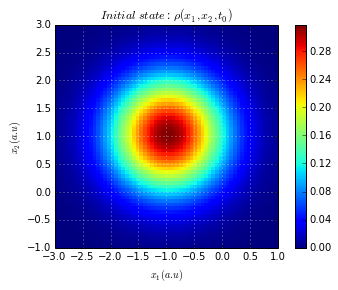

In [27]:
#----Plotting initial density probability 

M_init= fftpack.fftshift(np.abs(PsiT0_x)**2)
imshow(M_init,origin='lower',interpolation='none',extent = [-X1_amplitude,X1_amplitude, -X2_amplitude, X2_amplitude   ] )
cbar=colorbar()
plt.title('$ Initial  \\ state :\\ $'r'$  \rho(x_1,x_2,t_0)$')
xlabel('$ x_1 (a.u) $')
ylabel('$ x_2 (a.u) $')

grid('on',color='white')

xlim(-3,1)
ylim(-1,3)

(-1, 2)

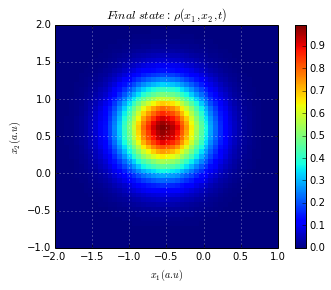

In [19]:
#----Plotting final density probability , after the propagation

M_final= fftpack.fftshift(np.abs(PsiT)**2)

imshow(M_final,origin='lower',interpolation='none',extent = [-X1_amplitude,X1_amplitude, -X2_amplitude, X2_amplitude   ] )
cbar=colorbar()

plt.title('$ Final \\ state :\\ $'r'$  \rho(x_1,x_2,t)$')
xlabel('$ x_1 (a.u) $')
ylabel('$ x_2 (a.u) $')
grid('on',color='white')
xlim(-2,1)
ylim(-1,2)

## 2.2 PLOTTING  DENSITY PROBABILITIES IN BASES : X1 AND X2

### $\rho (x_1, x_2,t)= | \psi(x_1,x_2,t)|^2\\  \rho_1 (x_1,t)= | \psi(x_1,t)|^2 =\int \rho(x_1, x_2,t)dx_2\\  \rho_2 (x_2,t)= | \psi(x_2,t)|^2 =\int \rho(x_1, x_2,t)dx_1\\ $

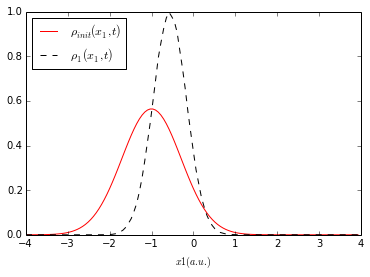

In [20]:
#--- Plotting  INITIAL AND FINAL density probabilities in "x1" base

rhox1_xg  = np.sum( np.abs(PsiT0_x/np.sqrt(  np.sum(np.abs(PsiT0_x)**2,axis=(0,1))*dX1*dX2  ))**2,axis=0 )*dX2

plt.plot(fftpack.fftshift(X1[0]),fftpack.fftshift(rhox1_xg ),'r',label = r'$\rho_{init}(x_1 , t) $')
plt.plot(fftpack.fftshift(X1[0]),fftpack.fftshift(rhox1_x ),'k--',label = r'$\rho_1(x_1 , t) $')
plt.legend(loc='upper left')
xlabel("$x1 (a.u.)$")

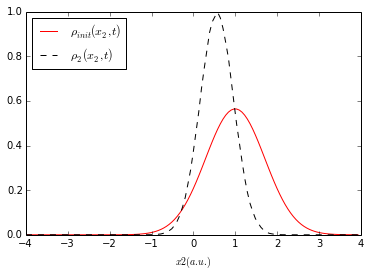

In [21]:
#--- Plotting  INITIAL AND FINAL density probabilities in "x2" base

rhox2_xg = np.sum(  np.abs(PsiT0_x/np.sqrt(  np.sum(np.abs(PsiT0_x)**2,axis=(0,1))*dX1*dX2  ))**2 ,axis=1 )*dX1

plt.plot(fftpack.fftshift(X2),fftpack.fftshift(rhox2_xg ),'r',label = r'$\rho_{init}(x_2 , t) $')
plt.plot(fftpack.fftshift(X2),fftpack.fftshift(rhox2_x ),'k--',label = r'$\rho_2(x_2 , t) $')
plt.legend(loc='upper left')
xlabel("$x2 (a.u.)$")

## 3. EHRENFEST'S THEOREMS

### $\rho (x_1, x_2,t)= | \psi(x_1,x_2,t)|^2\\  \rho_1 (x_1,t)= | \psi(x_1,t)|^2 =\int \rho(x_1, x_2,t)dx_2\\  \rho_2 (x_2,t)= | \psi(x_2,t)|^2 =\int \rho(x_1, x_2,t)dx_1\\ $

## 3.1)  1st Ehrenfest's Theorem :

# $ \frac{d< x_1 > }{dt}=\frac{< p_1  >}{m} $

### $< x_1 > = \int \rho_1 (x_1,t) x_1 \ dx_1$

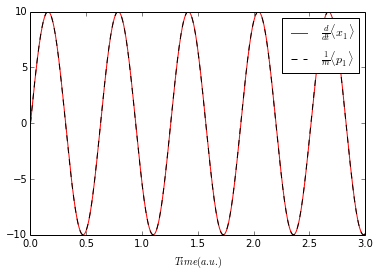

In [24]:
#---d<x>/dt

data_Expectation_dxdt = np.gradient(data_Expectation_X,dt)

#---plots

plt.plot(timeRange, data_Expectation_dxdt          ,"r" , label = '$ \\frac{d}{dt} \\langle x_1 \\rangle $' )
plt.plot(timeRange, np.real( np.array(data_Expectation_P)/mass ) ,"k--", label = '$ \\frac{1}{m} \\langle p_1 \\rangle $' )
#plt.legend(bbox_to_anchor=(1, 0.5), loc=2, prop={'size':22})
plt.xlabel("$Time (a.u.)$")
#plt.ylim([-0.0005,0.0005])
plt.xlim([0,3])
plt.legend(loc='upper right')

## 2.2)  2nd Ehrenfest's Theorem 

## $\frac{d< p_1 >}{dt} = < F_1 > = \frac{\partial V(x_1, x_2)}{\partial x_1}$

(0, 3)

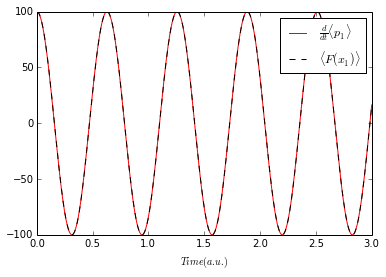

In [30]:
#---d<p>/dt
data_Expectation_dpdt = np.gradient(data_Expectation_P,dt)

#---Plots
plt.plot(timeRange, np.real(data_Expectation_dpdt )      , "r"  , label = '$ \\frac{d}{dt} \\langle p_1 \\rangle $' )
plt.plot(timeRange,  data_Expectation_F  ,"k--", label = '$ \\langle F(x_1) \\rangle $' )
#plt.legend(bbox_to_anchor=(1., 0.5), loc=2, prop={'size':22})
plt.xlabel("$Time (a.u.)$")
#plt.xlim([0,3])
plt.legend(loc='upper right')
#plt.ylim([-0.0005,0.0005])
plt.xlim([0,3])

## 3. SECOND ORDER EHRENFEST'S THEOREMS

## $3.1)$ $\frac{d< X_1^2 >}{dt} = \frac{1}{m}(< X_1 P_1  +  P_1 X_1 >)$

(0, 3)

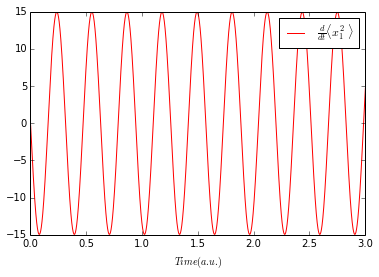

In [33]:
#---d< x^2 >/dt = (< x p > + < p x >)/m
data_Expectation_dx2dt=np.gradient(data_Expectation_X2,dt)

#data_Expectation_suma_xp_px_div_m =(1/mass)*( np.array(data_Expectation_XP) + np.array(data_Expectation_PX) ) 
#---plots
plt.plot(timeRange, data_Expectation_dx2dt      ,"r"     , label = '$ \\frac{d}{dt} \\langle x_1^2 \\rangle $' )
#plt.plot(timeRange, np.real( data_Expectation_suma_xp_px_div_m ) , label = '$ \\frac{1}{m} \\langle xp   + px \\rangle $' )
#plt.legend(bbox_to_anchor=(1, 0.8), loc=2, prop={'size':22})
plt.xlabel("$Time (a.u.)$")
#plt.xlim([1,3])
#plt.ylim([-1,0.5])
plt.legend(loc='upper right')
plt.xlim([0,3])


## 3.2) $\frac{d \langle p_1^2 \rangle }{dt} = -\omega^2 \langle x_1 p_1 + p_1 x_1 \rangle $

(0, 3)

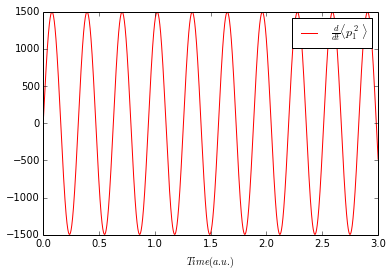

In [35]:
data_Expectation_dp2dt =np.gradient(data_Expectation_P2,dt)
#---plots
plt.plot( timeRange,np.real(data_Expectation_dp2dt),"r", label = '$ \\frac{d}{dt} \\langle p_1^2 \\rangle $' )
#plt.plot(timeRange, np.real( data_a4_x3p_px3 ) , label = '$ -4a \\langle x^3p   + px^3 \\rangle $' )
#plt.legend(bbox_to_anchor=(1, 0.5), loc=2, prop={'size':22})
plt.xlabel("$Time (a.u.)$")
#plt.xlim([1,3])
#plt.ylim([-2,6])
plt.legend(loc='upper right')
plt.xlim([0,3])

## 4. UNCERTAINTY PRINCIPLE

### $ \sigma_{x_1}=\sqrt{<x_1^2> -<x_1>^2}$   ;   $ \sigma_{p_1}=\sqrt{<p_1^2> -<p_1>^2}$

Min value:  0.500612101367


(1, 3)

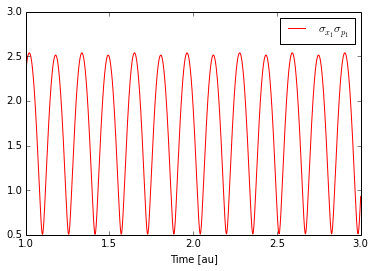

In [37]:
sigma2_p1 = np.array(data_Expectation_P2)-np.array(data_Expectation_P)**2
sigma2_x1 = np.array(data_Expectation_X2)-np.array(data_Expectation_X)**2
sigmax1_sigmap1=np.sqrt(sigma2_p1)*np.sqrt(sigma2_x1)

print "Min value: ", np.min(sigmax1_sigmap1)
#---Plots
plt.plot(timeRange,sigmax1_sigmap1,"r",label = r'$ \sigma_{x_1} \sigma_{p_1} $' )
plt.legend(bbox_to_anchor=(1, 0.8), loc=2, prop={'size':22})
plt.xlabel("Time [au]")
plt.legend(loc='upper right')
plt.xlim([1,3])